In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("ticks")
sns.set_context("talk")

In [3]:
FIELDS = [
    "full_date",
    "Headache",
    "Exercise",
    "Ibuprofen",
    "Paracetamol",
    "Coffee",
    "Aimovig",
]

In [4]:
daylio_df = pd.read_csv(
    "./data/processed/daylio_2021_06_27.csv",
    index_col="full_date",
    parse_dates=True,
)
daylio_df = daylio_df.resample("1D").first()

In [5]:
recent_daylio_df = daylio_df["2020-06":].copy()

In [6]:
recent_daylio_df["cumulative_headaches"] = recent_daylio_df.Headache.cumsum()
recent_daylio_df["cumulative_ibuprofen"] = recent_daylio_df.Ibuprofen.cumsum()

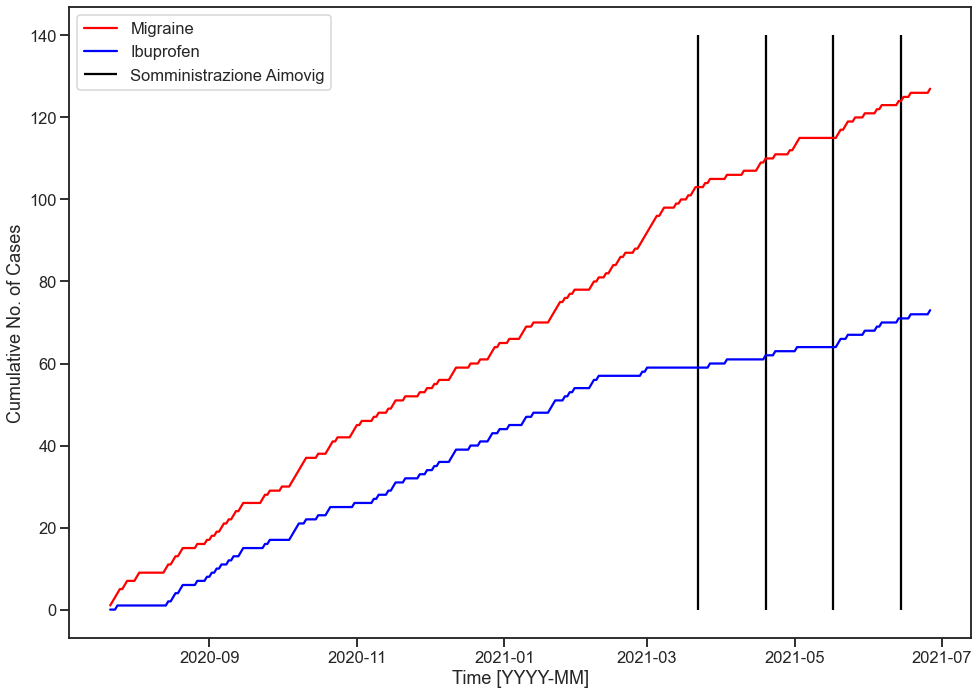

In [8]:
f, ax = plt.subplots(1, 1, figsize=(14, 10))

ax.plot(
    recent_daylio_df["cumulative_headaches"]["2020-05":], color="red", label="Migraine"
)
ax.plot(
    recent_daylio_df["cumulative_ibuprofen"]["2020-05":],
    color="blue",
    label="Ibuprofen",
)
ax.vlines(
    recent_daylio_df[recent_daylio_df["Aimovig"] == 1].index,
    0,
    140,
    color="black",
    label="Somministrazione Aimovig",
)
ax.set_xlabel("Time [YYYY-MM]")
ax.set_ylabel("Cumulative No. of Cases")
ax.legend(loc="upper left")

f.set_tight_layout(True)
plt.show()